## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: xlabel='count', ylabel='diagnosis'>

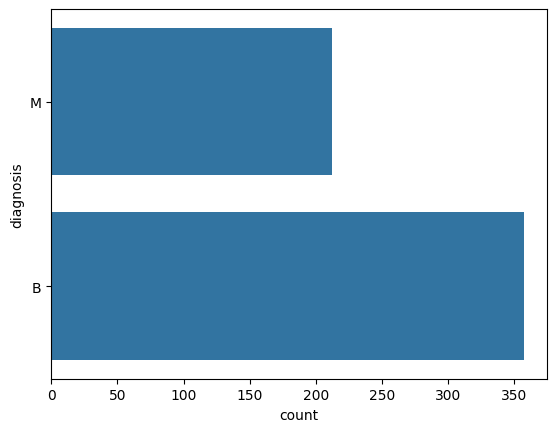

In [8]:
sns.countplot(df["diagnosis"])

In [18]:
target_col = "diagnosis"
# M : 0, B : 1
df[target_col] = df[target_col].replace({"M" : 0, "B" : 1})
print(df[target_col])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


<ipython-input-18-f5a0d7e6314e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[target_col] = df[target_col].replace({"M" : 0, "B" : 1})


<Axes: >

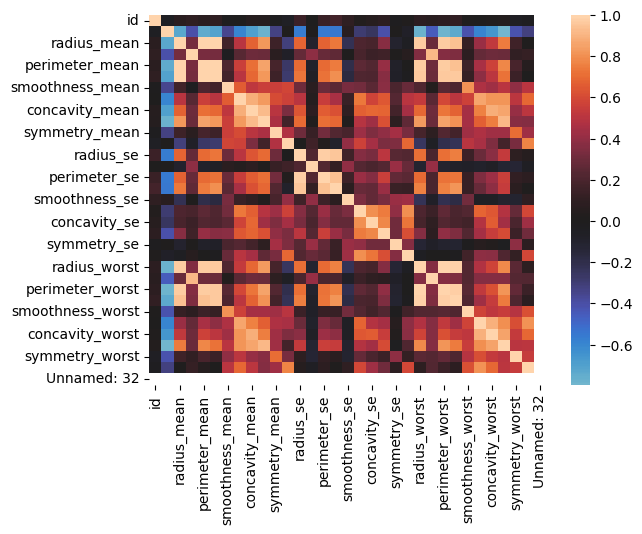

In [23]:
corr = df.corr()
sns.heatmap(corr, center=0)

In [29]:
corr[target_col].abs().sort_values(ascending=False)

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [32]:
df_drop = df.drop(["Unnamed: 32", "id"], axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Axes: xlabel='radius_mean', ylabel='Count'>

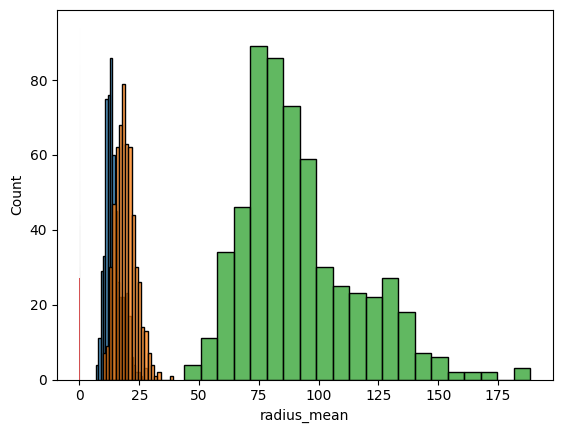

In [49]:
# plt.figure(figsize=(10,10))
sns.histplot(df["radius_mean"])
sns.histplot(df["texture_mean"])
sns.histplot(df["perimeter_mean"])

<Axes: xlabel='concave points_worst', ylabel='Count'>

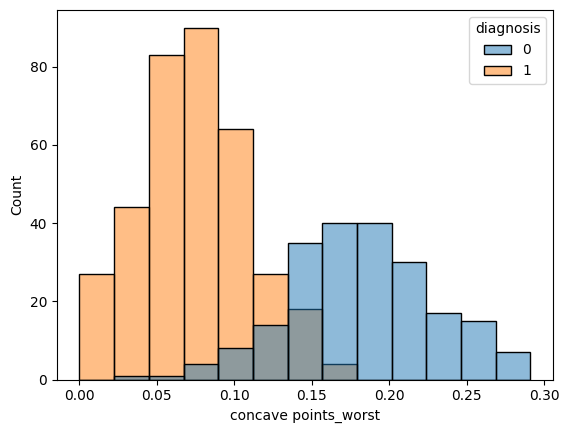

In [55]:
sns.histplot(x="concave points_worst", hue='diagnosis', data=df)

<Axes: xlabel='symmetry_se', ylabel='Count'>

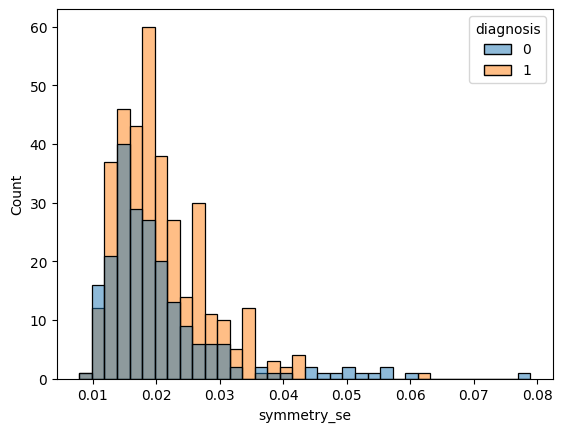

In [56]:
sns.histplot(x="symmetry_se", hue='diagnosis', data=df)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [58]:
# 데이터셋 나누기
x = df_drop.drop(target_col, axis=1)
y = df_drop[[target_col]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)
print(len(X_train))
print(len(X_test))

455
114


In [59]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
mul_cols = x.columns.tolist()
st_scaler = StandardScaler()
X_train[mul_cols] = st_scaler.fit_transform(X_train[mul_cols])
X_test[mul_cols] = st_scaler.transform(X_test[mul_cols])

print(X_train.head())

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
408     1.044985      0.297085        1.010448   0.903128         0.526420   
4       1.681411     -1.140982        1.703381   1.746022         0.286087   
307    -1.442609     -1.127329       -1.450464  -1.154826        -1.916968   
386    -0.554380     -1.197867       -0.552455  -0.559306        -1.113672   
404    -0.518408     -1.002181       -0.572082  -0.539704        -0.695638   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
408          0.488082        0.379781             0.981747       0.663632   
4            0.534308        1.351402             1.389686      -0.008492   
307         -1.423329       -1.072274            -1.171440      -0.085621   
386         -0.516737       -0.265180            -0.615972      -0.607160   
404         -1.143089       -0.855138            -0.737897      -0.882620   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
408

## 모델학습

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [74]:
gb.fit(X_train, y_train)

y_predict = gb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
from sklearn.metrics import accuracy_score as acc

print(acc(y_test, y_predict))

0.9649122807017544
